In [1]:
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO 
from subprocess import call

import numpy as np
import pandas as pd
import itertools

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve
from yellowbrick.model_selection import feature_importances
from sklearn.ensemble import RandomForestClassifier


from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances


from sklearn import tree
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().values.any()

False

In [5]:
l = df[('Class')]

In [6]:
l.value_counts()

0    284315
1       492
Name: Class, dtype: int64

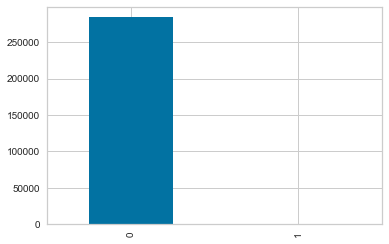

In [7]:
df['Class'].value_counts().plot.bar()

plt.show()

In [8]:
print('Raw counts: \n')
print(df['Class'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['Class'].value_counts(normalize=True))

Raw counts: 

0    284315
1       492
Name: Class, dtype: int64
-----------------------------------
Normalized counts: 

0    0.998273
1    0.001727
Name: Class, dtype: float64


In [9]:
print(df.columns)
df.dtypes

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

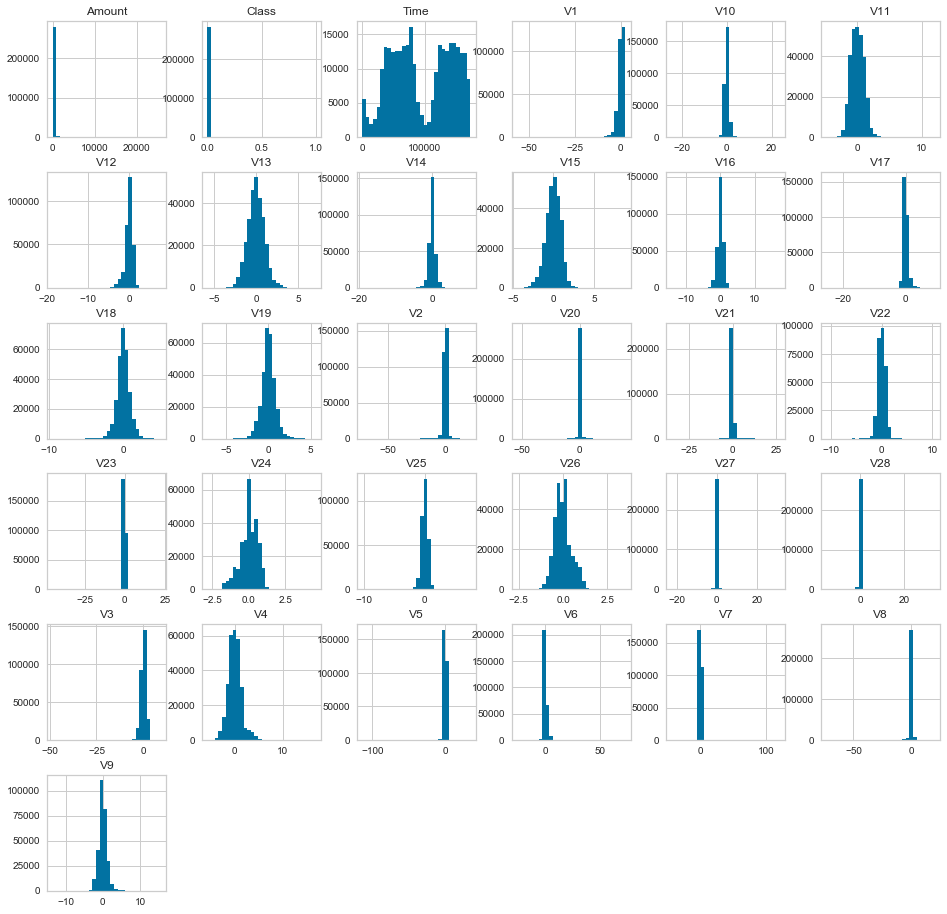

In [10]:
df.hist(bins=30, figsize=(16,16))
plt.show()

In [11]:
target = 'Class'
corr_matrix = df.corr()
corr_matrix[target].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [12]:
y = df['Class']
x = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

In [13]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=42)
print(pd.Series(y_train).value_counts())

0    227451
1       394
Name: Class, dtype: int64


In [15]:
x_train_initial, x_test, y_train_initial, y_test = train_test_split(x_scaled, 
                                                                    y, 
                                                                    test_size=0.2, 
                                                                    random_state=42)
print(pd.Series(y_train_initial).value_counts())

0    227451
1       394
Name: Class, dtype: int64


In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train_initial, 
                                                  y_train_initial, 
                                                  test_size=0.2,
                                                  random_state=42)
skf = StratifiedKFold(n_splits=5,random_state=42)

In [17]:
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_sample(x_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

0    284315
1       492
Name: Class, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    181946
0    181946
Name: Class, dtype: int64


Model 1 - Bagged Tree

In [18]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)
bagged_tree.fit(x_train_resampled,y_train_resampled)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [19]:
print(
bagged_tree.score(x_train_resampled,y_train_resampled))

0.9590400448484715


Model 2 - KNN

In [20]:
# clf = KNeighborsClassifier()

# clf.fit(x_train_resampled, y_train_resampled)

In [21]:
# clf.score(x_train_resampled, y_train_resampled)

Model 3 - Random Forest

In [22]:
# forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
# forest.fit(x_train_resampled, y_train_resampled)


In [23]:
# forest.score(x_train_resampled, y_train_resampled)

In [24]:
bagged_tree.get_params().keys()

dict_keys(['base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__presort', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

HPO

In [36]:
paramgrid = {'base_estimator__max_depth': [1 , 100, 200] , 'base_estimator__min_samples_leaf':[1 , 3 , 5]}
fgrid = GridSearchCV(bagged_tree , paramgrid , scoring = 'roc_auc' , n_jobs = -1 , cv = skf , return_train_score=False)
fgrid.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=5,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
     

In [28]:
it1 = fgrid.best_params_
it1

{'base_estimator__max_depth': 20, 'base_estimator__min_samples_leaf': 5}

In [30]:
it2 = fgrid.best_params_
it2

{'base_estimator__max_depth': 30, 'base_estimator__min_samples_leaf': 5}

In [33]:
it3 = fgrid.best_params_
it3

{'base_estimator__max_depth': 50, 'base_estimator__min_samples_leaf': 3}

In [35]:
it4 = fgrid.best_params_
it4

{'base_estimator__max_depth': 100, 'base_estimator__min_samples_leaf': 3}

In [37]:
it5 = fgrid.best_params_
it5

{'base_estimator__max_depth': 200, 'base_estimator__min_samples_leaf': 3}

Best model

In [38]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=200, min_samples_leaf = 3), 
                                 n_estimators=20)
bagged_tree.fit(x_train_resampled,y_train_resampled)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=200,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=3,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
 

In [39]:
print(
bagged_tree.score(x_train_resampled,y_train_resampled))

0.9998955734118914


In [41]:
best = fgrid.best_estimator_.predict_proba(x_train_resampled)[:,1]
best

array([0.  , 0.  , 0.  , ..., 1.  , 1.  , 0.95])

In [42]:
best_model = fgrid.best_estimator_

In [44]:
skf = StratifiedKFold(n_splits=5,random_state=42)
y_prob = cross_val_predict(bagged_tree ,x_train_resampled,y_train_resampled,method='predict_proba', cv=skf)[:,1]


In [46]:
fpr,tpr,threshold = roc_curve(y_train_resampled, y_prob)

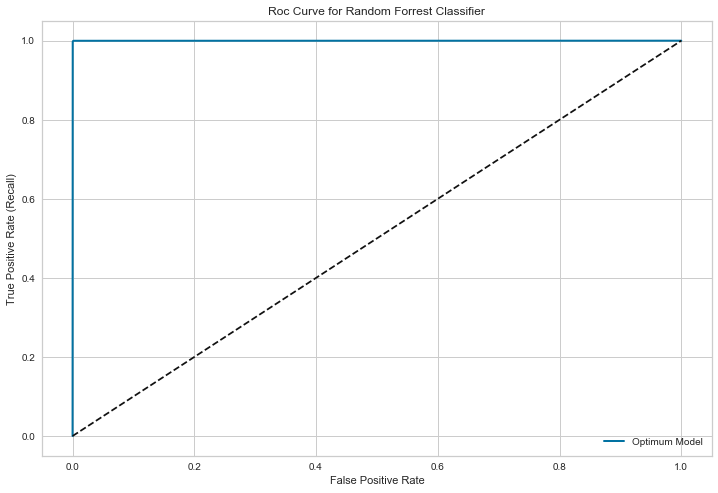

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    fig = plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,linewidth= 2, label=label)
    plt.plot([0,1], [0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Roc Curve for Random Forrest Classifier')
    plt.legend(loc=4)

plot_roc_curve(fpr, tpr, label='Optimum Model')
plt.show()

In [54]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

feature_importances = np.mean([
    tree.feature_importances_ for tree in fgrid.best_estimator_
], axis=0)

In [57]:
feature_importance = pd.DataFrame(feature_importances)

In [58]:
feature_importance.rename(columns={0:'Importance'}, inplace=True)

In [59]:
feature_importance['Feature'] =x_train.columns

In [60]:
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

In [61]:
feature_importance

,Importance,Feature
14,0.762001,14
4,0.052584,4
12,0.016014,12
10,0.014530,10
8,0.013758,8
29,0.010962,29
1,0.010236,1
0,0.008794,0
13,0.008355,13
25,0.007824,25


In [62]:
top_20_features = feature_importance.head(20)

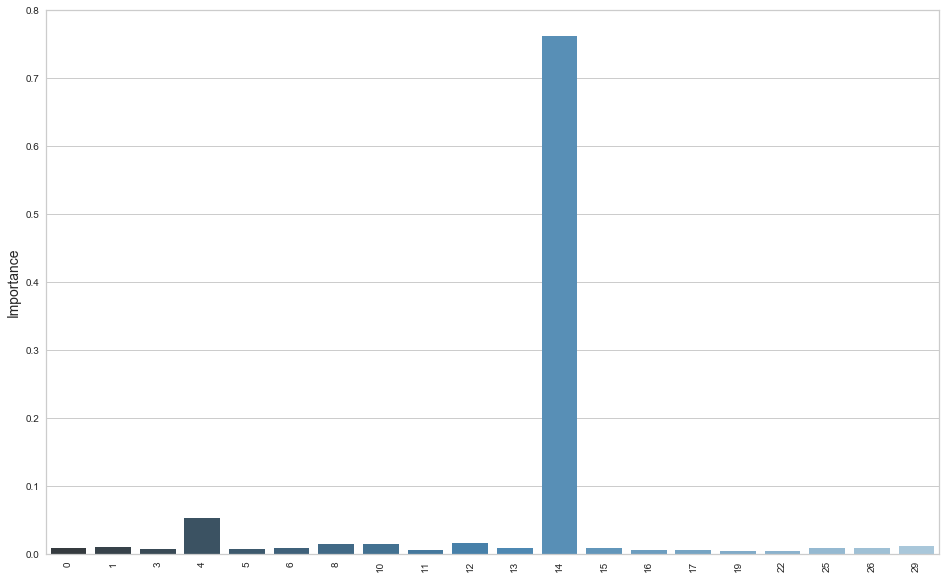

In [63]:
plt.figure(figsize=(16,10))
sns.barplot(x='Feature', y='Importance', data=top_20_features, palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel('Importance', fontsize=14)
plt.show()
